## <font color="red"> Uisng ARIMA Model</font>

In [2]:
import numpy as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
import pandas as pd

# Load the dataset
df = pd.read_csv("cleaned_dataset.csv")

df.head(3)

,date,demand,RRP,demand_pos_RRP,RRP_positive,demand_neg_RRP,RRP_negative,frac_at_neg_RRP,min_temperature,max_temperature,solar_exposure,rainfall,school_day,holiday
0,2015-01-01,99635.03,25.633696,97319.240,26.415953,2315.790,-7.240000,0.020833,13.3,26.9,23.6,0.0,0,1
1,2015-01-02,129606.01,33.138988,121082.015,38.837661,8523.995,-47.809777,0.062500,15.4,38.8,26.8,0.0,0,0
2,2015-01-03,142300.54,34.564855,142300.540,34.564855,0.000,0.000000,0.000000,20.0,38.2,26.5,0.0,0,0


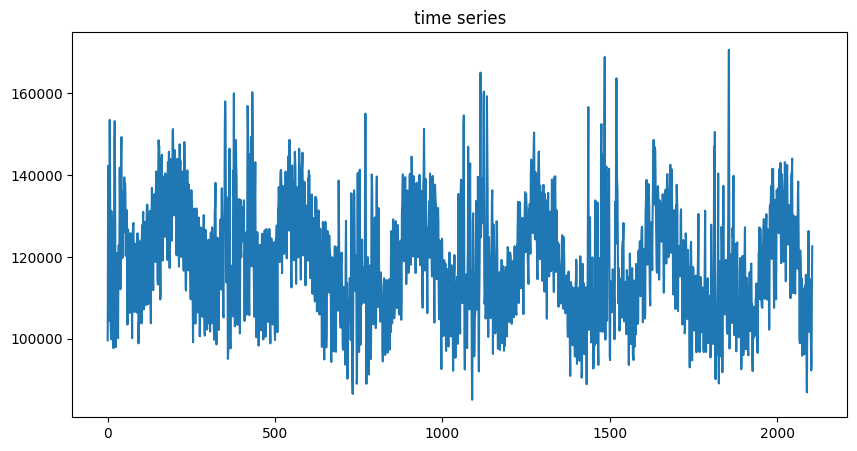

In [2]:
plt.figure(figsize=(10,5))
plt.plot(df['demand'])
plt.title("time series")
plt.show()

In [3]:
result=adfuller(df['demand'])

In [4]:
p_value = result[1]  

if p_value <= 0.05:
    print(f"The demand data is stationary (p-value: {p_value})")
else:
    print(f"Demand data is not stationary (p-value: {p_value})")


The demand data is stationary (p-value: 0.0016748806784635884)


In [5]:
result

(np.float64(-3.953447482126258),
 np.float64(0.0016748806784635884),
 26,
 2079,
 {'1%': np.float64(-3.433499298918619),
  '5%': np.float64(-2.8629312197305192),
  '10%': np.float64(-2.56751062103432)},
 np.float64(43059.6757647684))

In [6]:
df["demand_diff"] = df["demand"].diff()

df = df.dropna()

from statsmodels.tsa.stattools import kpss

result_kpss = kpss(df["demand_diff"], regression="c")
p_value = result_kpss[1]

if p_value > 0.05:
    print("Demand is stationary (p-value:", p_value, ")")
else:
    print("Demand is not stationary (p-value:", p_value, ")")

Demand is stationary (p-value: 0.1 )


C:\Users\prach\AppData\Local\Temp\ipykernel_6924\3003692716.py:7: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  result_kpss = kpss(df["demand_diff"], regression="c")


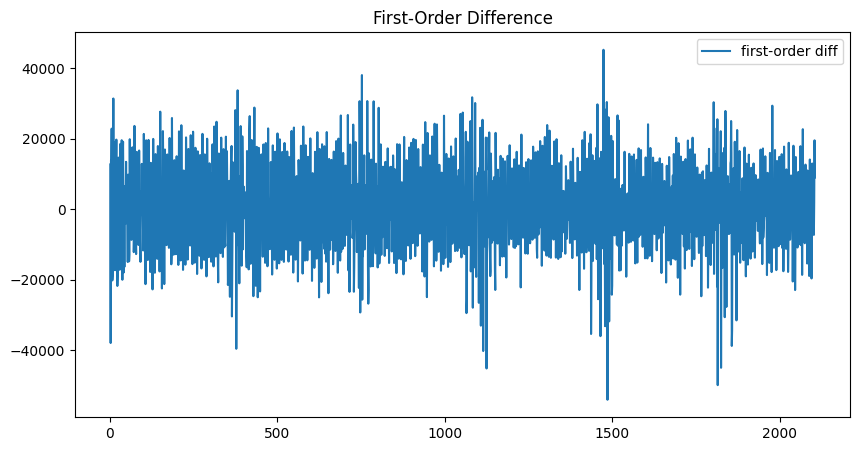

In [7]:
df['demand_diff'] = df['demand'].diff()  
df = df.dropna()

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(df['demand_diff'], label='first-order diff') 
plt.title('First-Order Difference')
plt.legend()
plt.show()

Index(['date', 'demand', 'RRP', 'demand_pos_RRP', 'RRP_positive',
       'demand_neg_RRP', 'RRP_negative', 'frac_at_neg_RRP', 'min_temperature',
       'max_temperature', 'solar_exposure', 'rainfall', 'school_day',
       'holiday', 'demand_diff'],
      dtype='object')


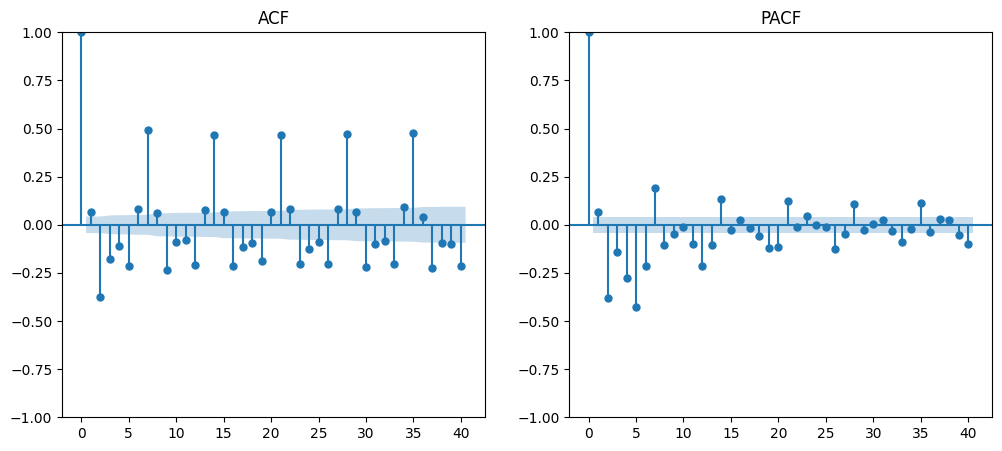

In [8]:
print(df.columns)

df['demand_diff'] = df['demand'].diff()
df = df.dropna()  
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

plt.subplot(121)
plot_acf(df['demand_diff'], lags=40, ax=plt.gca())
plt.title("ACF")

plt.subplot(122)
plot_pacf(df['demand_diff'], lags=40, ax=plt.gca())
plt.title("PACF")

plt.show()

In [9]:
df['demand_diff'] = df['demand'].diff()
df = df.dropna()  
from statsmodels.tsa.arima.model import ARIMA
p,d,q = 1,1,1
model = ARIMA(df['demand'], order=(p, d, q))
model_fit = model.fit()
print(model_fit.summary())


C:\Users\prach\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\prach\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\prach\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                 demand   No. Observations:                 2101
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -22317.989
Date:                Sun, 16 Mar 2025   AIC                          44641.977
Time:                        10:15:06   BIC                          44658.926
Sample:                             0   HQIC                         44648.185
                               - 2101                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5622      0.017     32.460      0.000       0.528       0.596
ma.L1         -0.9491      0.008   -111.978      0.000      -0.966      -0.932
sigma2       9.96e+07   4.78e-12   2.09e+19      0.0

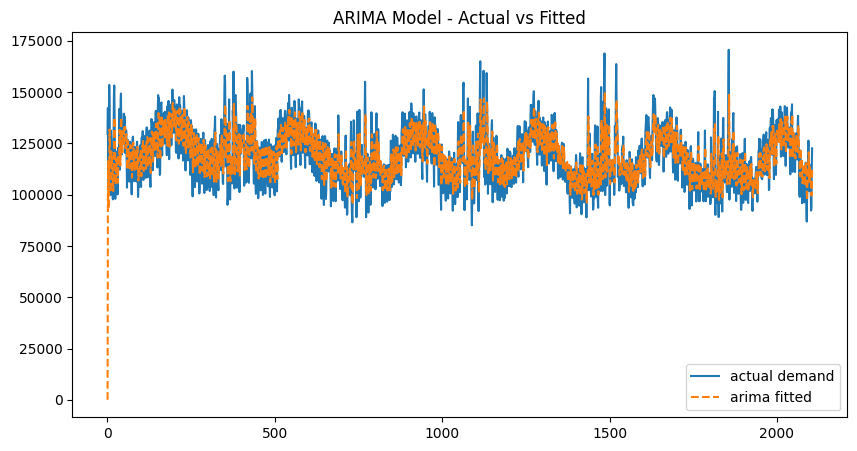

In [10]:
df['model_fit'] = model_fit.fittedvalues 

import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(df['demand'], label='actual demand')  
plt.plot(df['model_fit'], label='arima fitted', linestyle="dashed")

plt.title("ARIMA Model - Actual vs Fitted")
plt.legend()
plt.show()


In [32]:
print(df.columns)

Index(['ds', 'y', 'min_temperature', 'max_temperature', 'y', 'rainfall', 'RRP',
       'school_day'],
      dtype='object')


In [52]:
print(df.isnull().sum())

ds                 0
demand             0
RRP                0
demand_pos_RRP     0
RRP_positive       0
demand_neg_RRP     0
RRP_negative       0
frac_at_neg_RRP    0
min_temperature    0
max_temperature    0
solar_exposure     1
rainfall           3
school_day         0
holiday            0
dtype: int64


## <font color="Green">Prophet model forecast using Regressors</font>

In [7]:
import pandas as pd
import numpy as np
from prophet import Prophet
from sklearn.preprocessing import OneHotEncoder
df= pd.read_csv("cleaned_dataset.csv")
df = df.rename(columns={"date":"ds","demand":"y"})
df = df[["ds","y","min_temperature","max_temperature","solar_exposure","rainfall","RRP","school_day"]]

Importing plotly failed. Interactive plots will not work.


In [8]:
model=Prophet()
model.add_country_holidays(country_name='AU')
model.add_regressor('min_temperature')
model.add_regressor('max_temperature')
model.add_regressor('solar_exposure')
model.add_regressor('RRP')
model.add_regressor('school_day')
model.add_regressor('rainfall')

In [9]:
print(df.isna().sum()) 


ds                 0
y                  0
min_temperature    0
max_temperature    0
solar_exposure     1
rainfall           3
RRP                0
school_day         0
dtype: int64


In [10]:
df['solar_exposure'].fillna(df['solar_exposure'].mean(), inplace=True)
df['rainfall'].fillna(df['rainfall'].mean(), inplace=True)


C:\Users\prach\AppData\Local\Temp\ipykernel_8128\2661074170.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['solar_exposure'].fillna(df['solar_exposure'].mean(), inplace=True)
C:\Users\prach\AppData\Local\Temp\ipykernel_8128\2661074170.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves

In [11]:
model.fit(df)

09:12:04 - cmdstanpy - INFO - Chain [1] start processing
09:12:04 - cmdstanpy - INFO - Chain [1] done processing


In [13]:
future=model.make_future_dataframe(periods=30)
future["min_temperature"] = df["min_temperature"].iloc[-1]
future["max_temperature"] = df["max_temperature"].iloc[-1]
future["solar_exposure"] = df["solar_exposure"].iloc[-1]
future["RRP"] = df["RRP"].iloc[-1]
future["school_day"] = df["school_day"].iloc[-1]
future["rainfall"] = df["rainfall"].iloc[-1]

In [14]:
future

,ds,min_temperature,max_temperature,solar_exposure,RRP,school_day,rainfall
0,2015-01-01,8.9,12.6,5.8,75.771059,0,1.0
1,2015-01-02,8.9,12.6,5.8,75.771059,0,1.0
2,2015-01-03,8.9,12.6,5.8,75.771059,0,1.0
3,2015-01-04,8.9,12.6,5.8,75.771059,0,1.0
4,2015-01-05,8.9,12.6,5.8,75.771059,0,1.0
...,...,...,...,...,...,...,...
2131,2020-11-01,8.9,12.6,5.8,75.771059,0,1.0
2132,2020-11-02,8.9,12.6,5.8,75.771059,0,1.0
2133,2020-11-03,8.9,12.6,5.8,75.771059,0,1.0
2134,2020-11-04,8.9,12.6,5.8,75.771059,0,1.0


In [15]:
forecast=model.predict(future)

In [16]:
print(df.columns)        
print(forecast.columns)  


Index(['ds', 'y', 'min_temperature', 'max_temperature', 'solar_exposure',
       'rainfall', 'RRP', 'school_day'],
      dtype='object')
Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'ANZAC Day', 'ANZAC Day_lower', 'ANZAC Day_upper', 'Australia Day',
       'Australia Day_lower', 'Australia Day_upper', 'Boxing Day',
       'Boxing Day_lower', 'Boxing Day_upper', 'Christmas Day',
       'Christmas Day_lower', 'Christmas Day_upper', 'Easter Monday',
       'Easter Monday_lower', 'Easter Monday_upper', 'Good Friday',
       'Good Friday_lower', 'Good Friday_upper', 'New Year's Day',
       'New Year's Day_lower', 'New Year's Day_upper', 'RRP', 'RRP_lower',
       'RRP_upper', 'additive_terms', 'additive_terms_lower',
       'additive_terms_upper', 'extra_regressors_additive',
       'extra_regressors_additive_lower', 'extra_regressors_additive_upper',
       'holidays', 'holidays_lower', 'holidays_upper', 'max_temperature',
       'max_temperature_

In [18]:
df.rename(columns={"Date": "ds"}, inplace=True)
forecast.rename(columns={"Date": "ds"}, inplace=True)


In [19]:
df["ds"] = pd.to_datetime(df["ds"])
forecast["ds"] = pd.to_datetime(forecast["ds"])


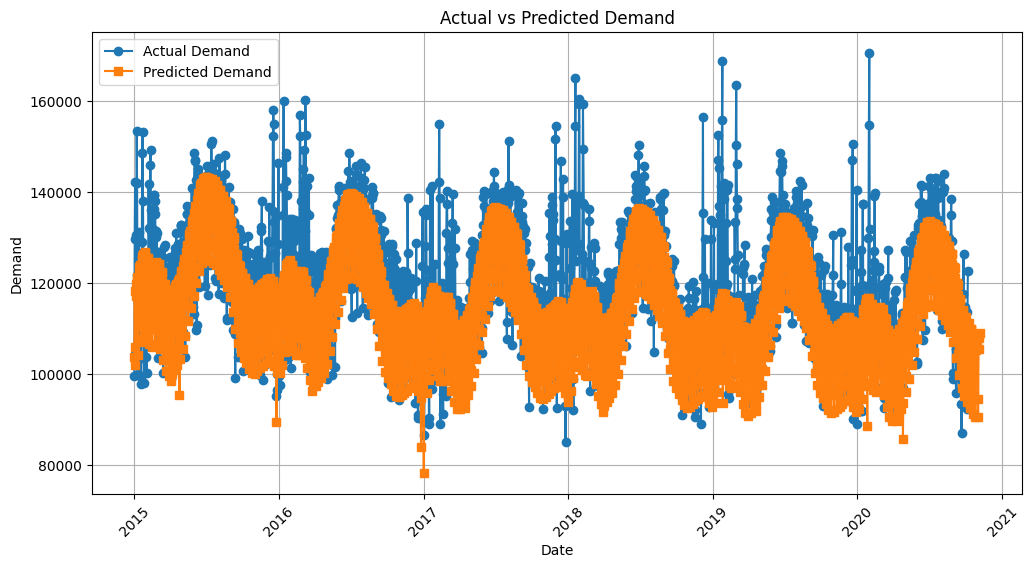

In [20]:
plt.figure(figsize=(12,6))
plt.plot(df["ds"], df["y"], label="Actual Demand", marker='o', linestyle='-')
plt.plot(forecast["ds"], forecast["yhat"], label="Predicted Demand", marker='s')
plt.xlabel("Date")
plt.ylabel("Demand")
plt.title("Actual vs Predicted Demand")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.show()


In [21]:
from sklearn.metrics import mean_squared_error
import numpy as np


In [23]:
print("Length of actual values:", len(df["y"]))
print("Length of predicted values:", len(forecast["yhat"]))


Length of actual values: 2106
Length of predicted values: 2136


In [24]:
merged_df = df.merge(forecast[['ds', 'yhat']], on='ds', how='inner')
actual_values = merged_df["y"]
predicted_values = merged_df["yhat"]

print("Length after merging:", len(actual_values), len(predicted_values))


Length after merging: 2106 2106


In [31]:
from sklearn.metrics import mean_absolute_error
import numpy as np


forecast = model.predict(future)
df_results = df.merge(forecast[['ds', 'yhat']], on='ds', how='inner')

y_true = df_results['y']
y_pred = df_results['yhat']
mae = mean_absolute_error(y_true, y_pred)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
print(f"Optimized MAE: {mae}")
print(f"Optimized RMSE: {rmse}")
print(f"Optimized MAPE: {mape:.2f}%")

Optimized MAE: 6677.892462461585
Optimized RMSE: 9592.28983936224
Optimized MAPE: 5.39%


### MAE,RMSE,MAPE:- 
    Optimized MAE: 6677.892462461585
    Optimized RMSE: 9592.28983936224
    Optimized MAPE: 5.39%

## <FONT color="Green">Prophet model forecast Without adding Regressors</font>

In [32]:
model_no_reg = Prophet(
    changepoint_prior_scale=0.03, 
    seasonality_mode='additive',
    yearly_seasonality=True,
    weekly_seasonality=True,
    daily_seasonality=False
)

In [34]:
model_no_reg.fit(df)

09:34:23 - cmdstanpy - INFO - Chain [1] start processing
09:34:24 - cmdstanpy - INFO - Chain [1] done processing


In [36]:
future_no_reg = model_no_reg.make_future_dataframe(periods=30, freq='D')
forecast_no_reg = model_no_reg.predict(future_no_reg)
df_eval_no_reg = df[['ds', 'y']].merge(forecast_no_reg[['ds', 'yhat']], on='ds', how='left')
mae_no_reg = mean_absolute_error(df_eval_no_reg['y'], df_eval_no_reg['yhat'])
rmse_no_reg = np.sqrt(mean_squared_error(df_eval_no_reg['y'], df_eval_no_reg['yhat']))
mape_no_reg = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
print(f"MAE (No Regressors): {mae_no_reg:.2f}")
print(f"RMSE (No Regressors): {rmse_no_reg:.2f}")
print(f"mape (No Regressors): {mape_no_reg:.2f}")

MAE (No Regressors): 6212.10
RMSE (No Regressors): 8675.32
mape (No Regressors): 5.39


### MAE,RMSE.MAPE:
    MAE : 6212.10
    RMSE : 8675.32
    mape : 5.39

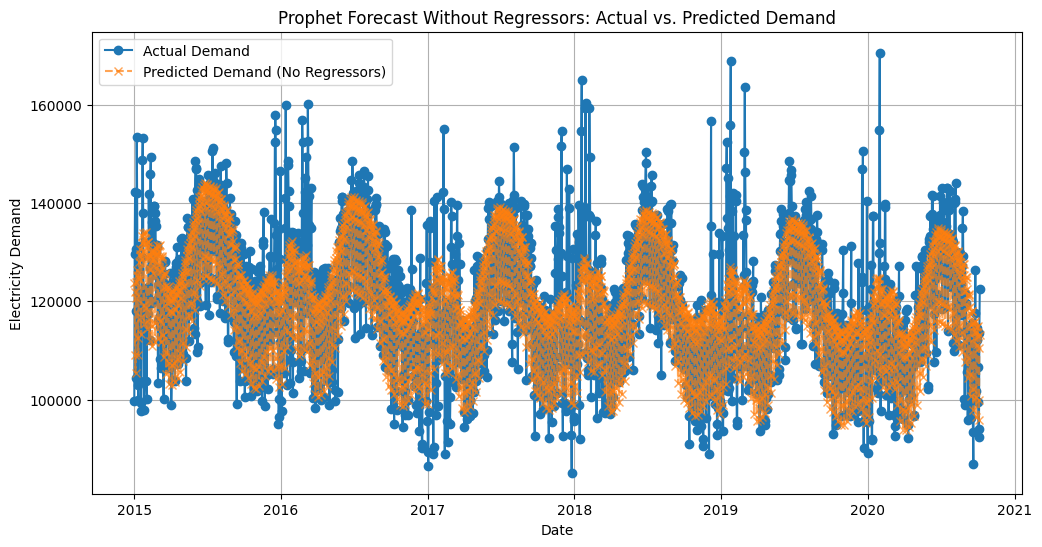

In [37]:
plt.figure(figsize=(12, 6))
plt.plot(df_eval_no_reg['ds'], df_eval_no_reg['y'], label='Actual Demand', marker='o', linestyle='-')
plt.plot(df_eval_no_reg['ds'], df_eval_no_reg['yhat'], label='Predicted Demand (No Regressors)', marker='x', linestyle='--', alpha=0.7)
plt.xlabel("Date")
plt.ylabel("Electricity Demand")
plt.title("Prophet Forecast Without Regressors: Actual vs. Predicted Demand")
plt.legend()
plt.grid(True)
plt.show()

## <font color="Brrown">Forecasting prediction for One Year:-</font>

In [39]:
from prophet import Prophet
import pandas as pd

model = Prophet(yearly_seasonality=True, weekly_seasonality=True, daily_seasonality=False)
model.fit(df)  
future = model.make_future_dataframe(periods=365)
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(10)


09:39:15 - cmdstanpy - INFO - Chain [1] start processing
09:39:16 - cmdstanpy - INFO - Chain [1] done processing


,ds,yhat,yhat_lower,yhat_upper
2461,2021-09-27,108997.943328,98160.456617,120184.994641
2462,2021-09-28,111650.645990,100971.666622,122307.038049
2463,2021-09-29,112596.436249,101111.856918,123929.774369
2464,2021-09-30,112854.919447,101946.490832,124193.357797
2465,2021-10-01,110820.825710,99445.678058,122149.549783
2466,2021-10-02,97659.368151,87287.064826,109412.314412
2467,2021-10-03,93532.027959,82704.974434,105565.231923
2468,2021-10-04,108291.715745,96706.300117,120207.376402
2469,2021-10-05,110979.609205,99600.089565,122195.138994
2470,2021-10-06,111940.820292,100873.062028,122418.548069


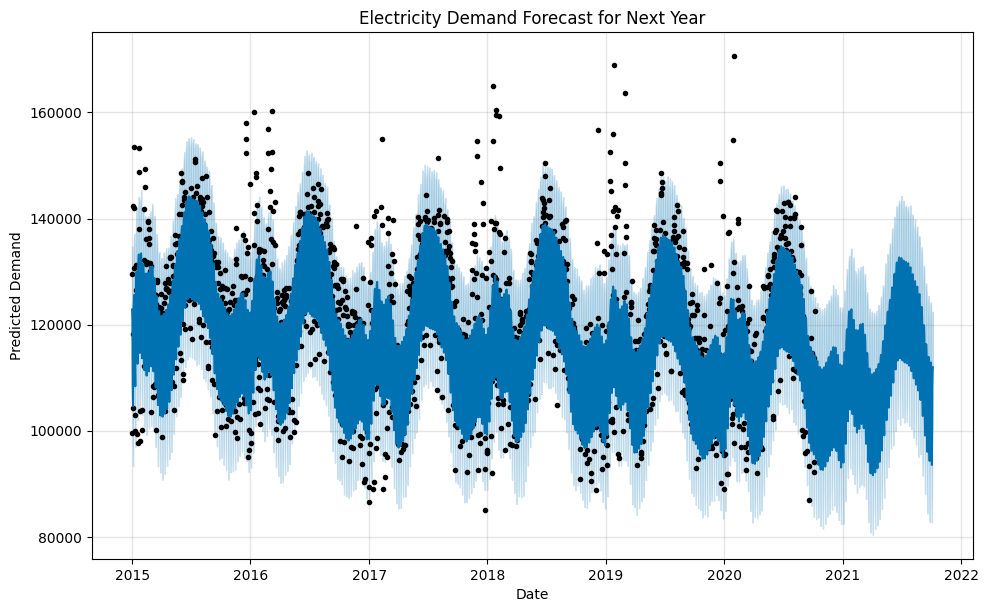

In [40]:
import matplotlib.pyplot as plt

model.plot(forecast)
plt.title("Electricity Demand Forecast for Next Year")
plt.xlabel("Date")
plt.ylabel("Predicted Demand")
plt.grid(True)
plt.show()


In [41]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].to_csv("electricity_forecast_next_year.csv", index=False)


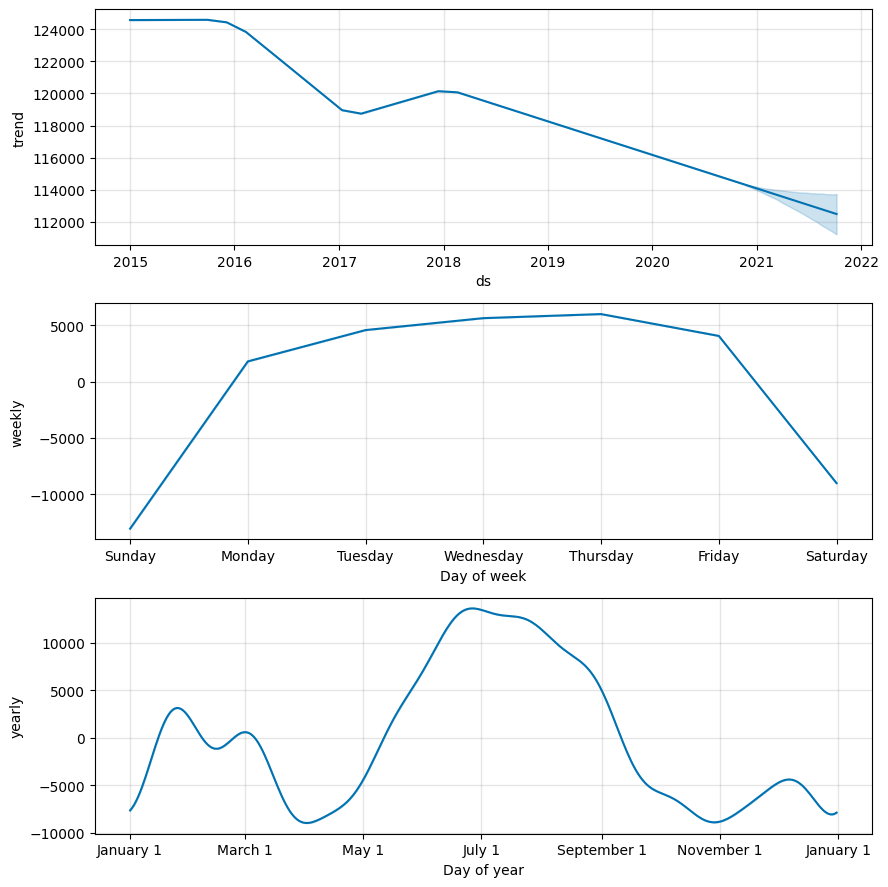

In [42]:
fig2 = model.plot_components(forecast)
plt.show()